In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
path = r'D:\photos\robomaster\4.png'
img = cv2.imread(path, 1)
gray_img = cv2.imread(path ,0)

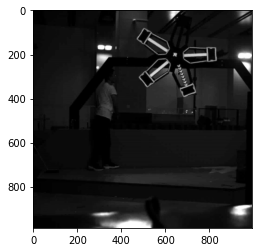

In [4]:
plt.imshow(gray_img,cmap='gray')

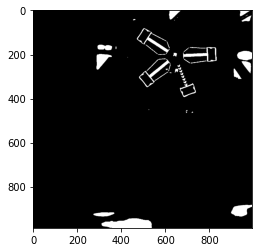

In [5]:
bin_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)[1]
plt.imshow(bin_img, cmap='gray')

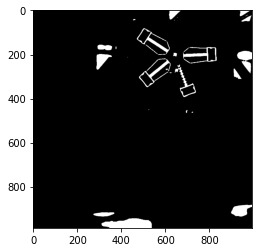

In [6]:
import numpy as np
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(bin_img,kernel)
erosion = cv2.erode(dilation, kernel)
plt.imshow(erosion,'gray')

In [31]:
contours,hierarchy = cv2.findContours(erosion, 
                            cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours2,hierarchy2 = cv2.findContours(erosion, 
                            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#返回一个list，每个元素是个np.ndarray

36


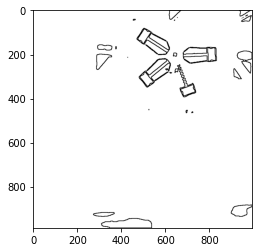

In [32]:
white_canvas = np.ones([erosion.shape[0], erosion.shape[1], 3], 
                       dtype=np.uint8)*255
cv2.drawContours(white_canvas, contours, -1, 0, 2)
print(len(contours))
plt.imshow(white_canvas)

31


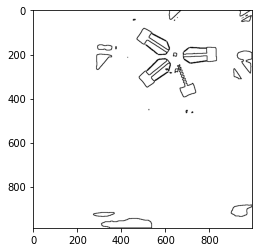

In [29]:
white_canvas = np.ones([erosion.shape[0], erosion.shape[1], 3], 
                       dtype=np.uint8)*255
cv2.drawContours(white_canvas, contours2, -1, 0, 2)
print(len(contours2))
plt.imshow(white_canvas)

5


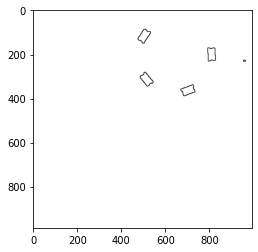

In [33]:
contours_copy = contours.copy() #深复制
while contours2:
    contour2 = contours2.pop()
    for i in range(len(contours)):#不能动态修改数组，使用长度来循环，break来终止
        if len(contours_copy[i]) == len(contour2):
            del contours_copy[i] #删除重复的
            break
white_canvas = np.ones([erosion.shape[0], erosion.shape[1], 3], 
                       dtype=np.uint8)*255
cv2.drawContours(white_canvas, contours_copy, -1, 0, 2)
print(len(contours_copy))
plt.imshow(white_canvas)
#总轮廓减去外轮廓，只剩下装甲板